Ronen Shekel - 29/09/2024

In [8]:
from pianoq.misc.misc import detect_gaussian_spots_subpixel
from pianoq_results.misc import my_mesh
%matplotlib ipympl
import glob, os, sys, datetime
import numpy as np
import matplotlib.pyplot as plt
from pianoq_results.scan_result import ScanResult
from pianoq_results.fits_image import FITSImage

So I wanted to switch from the BS to a mirror, to get a 4X coincidence signal (idler will always go straight, and signal will always be reflected). I began looking with the camera:

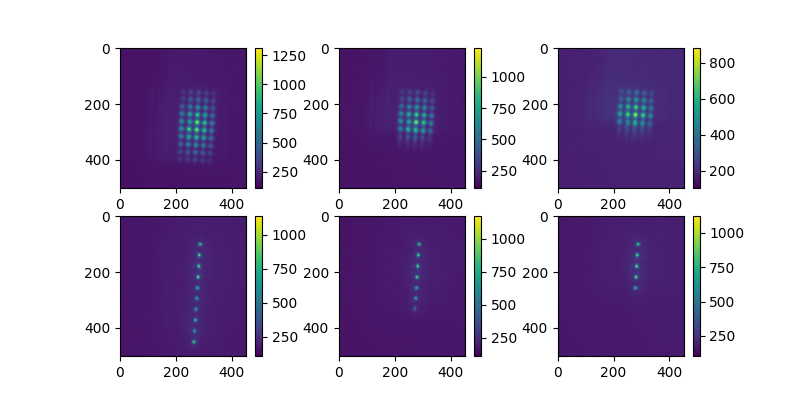

In [39]:

fig, axes = plt.subplots(2, 3, figsize=(8, 4))
im = FITSImage(r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_25_11_09_03_imaging_to_plane_11_bottom.fits")
imm = axes[0, 0].imshow(im.image)
fig.colorbar(imm, ax=axes[0, 0])

im = FITSImage(r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_25_11_10_18_imaging_to_plane_11_halfway.fits")
imm = axes[0, 1].imshow(im.image)
fig.colorbar(imm, ax=axes[0, 1])

im = FITSImage(r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_25_11_14_34_imaging_to_plane_11_best.fits")
imm = axes[0, 2].imshow(im.image)
fig.colorbar(imm, ax=axes[0, 2])

im = FITSImage(r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_25_11_16_48_U1_bottom.fits")
imm = axes[1, 0].imshow(im.image)
fig.colorbar(imm, ax=axes[1, 0])

im = FITSImage(r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_25_11_17_34_U1_halfway.fits")
imm = axes[1, 1].imshow(im.image)
fig.colorbar(imm, ax=axes[1, 1])

im = FITSImage(r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_25_11_18_55_U1_best.fits")
imm = axes[1, 2].imshow(im.image)
fig.colorbar(imm, ax=axes[1, 2])


And it seemed that when doing imaging with lenses it didn't work quite so well, but when performing some random Haar 5X5 U transformation, I can get nicely the top 5 spots. The difference probably has to do with the fact that the mirror asn't at plane 11, and how the field looks in "plane 10.5" in both cases. 

Anyway, I was pretty optimistic. So I switched the actual BS next tot the detectors with a mirror. Then there were Meh 2 days, where I had a silly misunderstanding of up and down directions (the previous convention was that the idler, which is photons going straight through the BS, looks at the bottom out of 10 spots. But this of course doesn't work anymore. The mirror forces us that the idler should look at the upper spots). Then I had further meh since I couldn't find the single counts that were reflected. I used the diode for reference, and that helped to get them pretty quickly. From there it wasn't long till I got the mirror to a pretty good vertical position in between, and it seemed to clip 1.5 spots from each photon: 

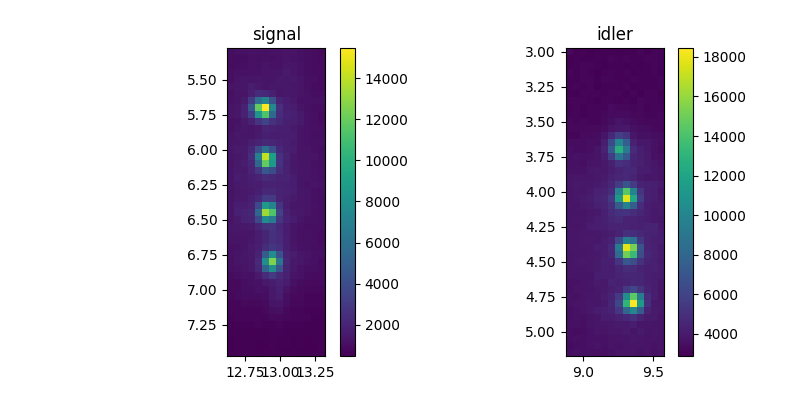

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_29_10_27_23_signal_3.5_spots_final.scan")
my_mesh(s.X, s.Y, s.single2s, ax=axes[0], title='signal')
# detect_gaussian_spots_subpixel(s.single2s, s.X, s.Y[::-1], print_popt=True)

s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_29_10_27_34_idler_3.5_spots_final.scan")
my_mesh(s.X, s.Y, s.single1s, ax=axes[1], title='idler')
# detect_gaussian_spots_subpixel(s.single1s, s.X, s.Y[::-1], print_popt=True)

Where we see that the lower spot in signal and upper in idler is less intense. It seems that the mirror crops 1.5 spots from each picture. To overcome this I added a linear tilt on plane 10 of the SLM. This way the WFM stays the same, and I have the full sized mask, but I just move where it hits. The downside is diffraction, and not all energy is deflected from the linear grating. So after some handwaving, I tried adding a grating with 12-pixels/2\*pi, and then 10-pixels/2\*pi. 

Text(0.5, 0.98, '10 pixels per 2*pi')

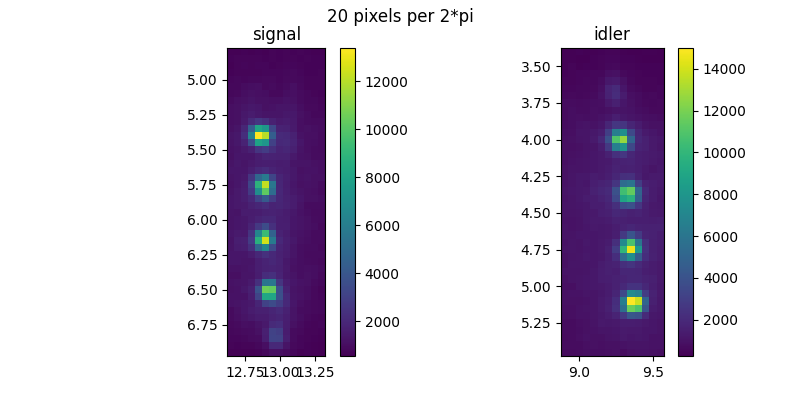

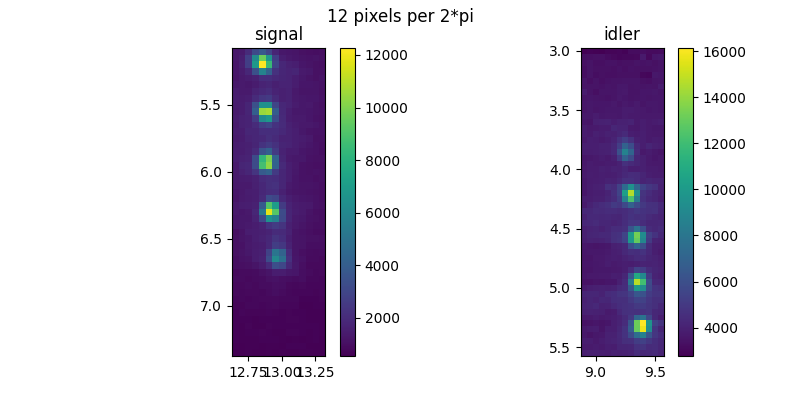

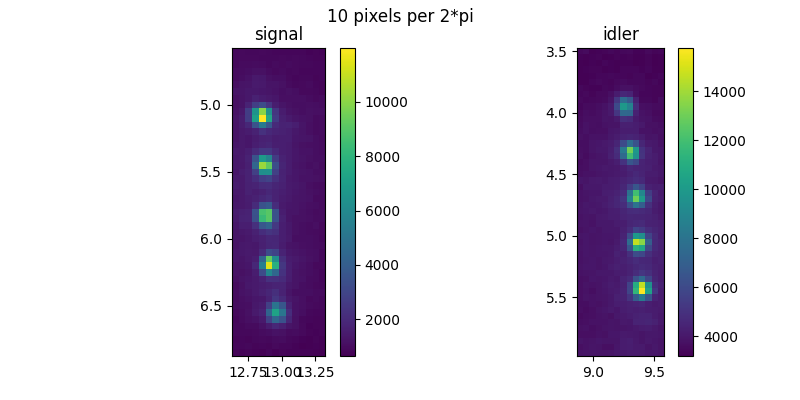

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_29_13_08_01_signal_3.5_spots_tilt_20.scan")
my_mesh(s.X, s.Y, s.single2s, ax=axes[0], title='signal')
# detect_gaussian_spots_subpixel(s.single2s, s.X, s.Y[::-1], print_popt=True)
s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_29_13_07_11_idler_3.5_spots_tilt_20.scan")
my_mesh(s.X, s.Y, s.single1s, ax=axes[1], title='idler')
# detect_gaussian_spots_subpixel(s.single2s, s.X, s.Y[::-1], print_popt=True)
fig.suptitle('20 pixels per 2*pi')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_29_11_08_24_signal_3.5_spots_tilt_12.scan")
my_mesh(s.X, s.Y, s.single2s, ax=axes[0], title='signal')
# detect_gaussian_spots_subpixel(s.single2s, s.X, s.Y[::-1], print_popt=True)
s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_29_11_09_27_idler_3.5_spots_tilt_12.scan")
my_mesh(s.X, s.Y, s.single1s, ax=axes[1], title='idler')
# detect_gaussian_spots_subpixel(s.single2s, s.X, s.Y[::-1], print_popt=True)
fig.suptitle('12 pixels per 2*pi')


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_29_11_33_05_signal_3.5_spots_tilt_10.scan")
my_mesh(s.X, s.Y, s.single2s, ax=axes[0], title='signal')
# detect_gaussian_spots_subpixel(s.single2s, s.X, s.Y[::-1], print_popt=True)
s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_29_11_33_08_idler_3.5_spots_tilt_10.scan")
my_mesh(s.X, s.Y, s.single1s, ax=axes[1], title='idler')
# detect_gaussian_spots_subpixel(s.single2s, s.X, s.Y[::-1], print_popt=True)
fig.suptitle('10 pixels per 2*pi')

There is some luck element here with the rather grainy 50-um scan, but it seems pretty consistent that I do lose a non-trivial amount of counts because of these tilts, where a stronger tilt causes more loss, so this isn't the best idea. (though the tilts do do what I wanted them to, and I do get almost good enough uniformity of the 5 spots in both photons.) 

It seems like the main solution for the thick mirror dead-zone will be with WFM, to aim for the outer parts of plane 11. This shouldn't really be too bad, let's try it. 

So to do this in the WFM I just add a parameter of the width of the dead middle zone, to send the spots away from there. Here setting it to 400*2 um: 

In [35]:
from pianoq.simulations.mplc_sim.mplc_modes2 import gen_input_spots_array
from pianoq.simulations.mplc_sim.mplc_sim import MPLCSim
from pianoq.simulations.mplc_sim.consts import default_wfm_conf

conf = default_wfm_conf.copy()
conf['active_planes'] = np.array([True] * 11)
conf['N_modes'] = 10

mplc = MPLCSim(conf=conf)
input_spots, x_modes_in, y_modes_in = gen_input_spots_array(waist=45e-6, D_between_modes=360e-6, XX=mplc.XX, YY=mplc.YY, dim=5, deltax_in=0, deltay_in=0, dead_middle_zone=400e-6)

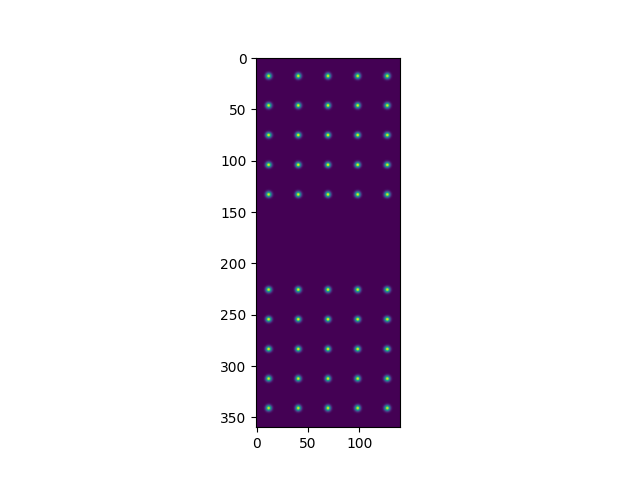

In [36]:
fig, ax = plt.subplots()
ax.imshow((np.abs(input_spots.sum(axis=0))**2)[mplc.res.active_slice])


I finally used a combination of a very slight linear tilt (35 pixels per 2*pi), together with a large middle dead zone, and got nice spots:

Text(0.5, 0.98, '35 pixels per 2*pi + 450um deadzone')

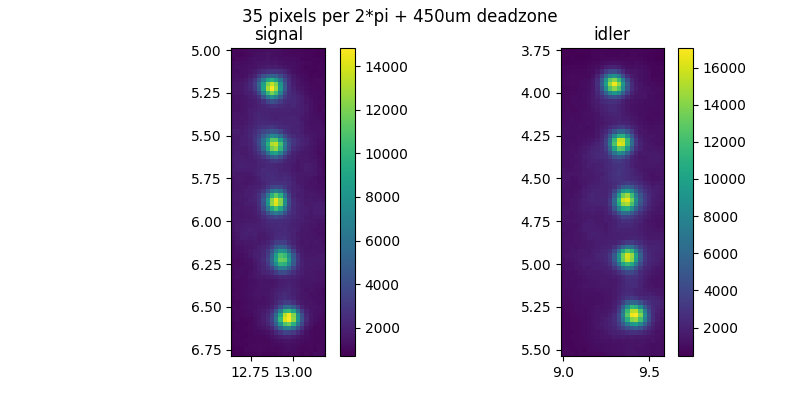

In [37]:

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_30_09_28_15_signal_5_spots_tilt_35_deadzone_450_fine.scan")
my_mesh(s.X, s.Y, s.single2s, ax=axes[0], title='signal')
# detect_gaussian_spots_subpixel(s.single2s, s.X, s.Y[::-1], print_popt=True)
s = ScanResult(path=r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_30_09_26_08_idler_5_spots_tilt_35_deadzone_450_fine.scan")
my_mesh(s.X, s.Y, s.single1s, ax=axes[1], title='idler')
# detect_gaussian_spots_subpixel(s.single2s, s.X, s.Y[::-1], print_popt=True)
fig.suptitle('35 pixels per 2*pi + 450um deadzone')

This is how the masks look like now: 

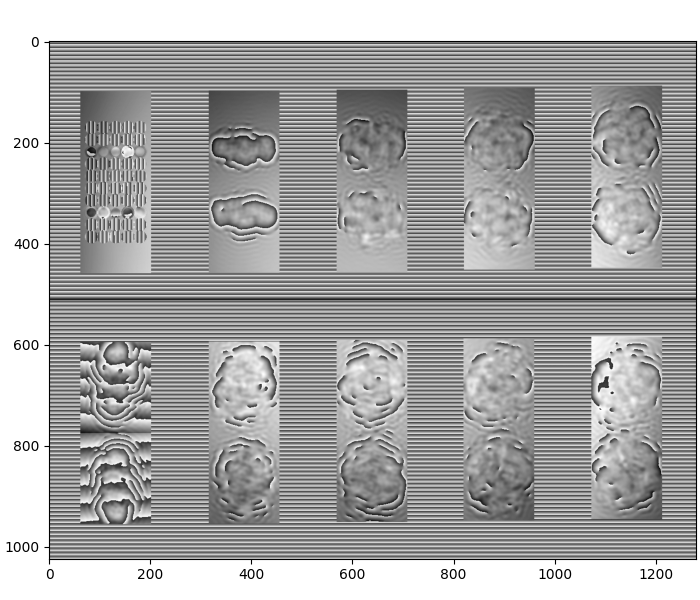

In [53]:
masks_path = r"G:\My Drive\Projects\MPLC\results\lab\2024_09_25_BS_to_mirror\2024_09_29_14_27_10_U1U.masks"  # with dead zone 
from pianoq.lab.mplc.mplc_device import MPLCDevice
from pianoq.simulations.mplc_sim.mplc_sim_result import MPLCMasks
from pianoq.lab.mplc.mask_utils import remove_input_modes, add_phase_input_spots
from pianoq.misc.mplt import mimshow
modes_to_keep = np.array([3, 8, 13, 18, 23, 28, 33, 38, 43, 48])

msks = MPLCMasks()
msks.loadfrom(masks_path)
masks = msks.real_masks
masks = remove_input_modes(masks, modes_to_keep=modes_to_keep)
phases = np.random.uniform(0, 2*np.pi, size=50)
masks = add_phase_input_spots(masks, phases)

mplc = MPLCDevice(init_fig=False)
slm_mask = mplc.create_slm_mask(np.angle(masks).astype(float), linear_tilts=True, plane_10_tilts=35)
uint_final_mask = mplc.convert_to_uint8(slm_mask)
fig, ax = plt.subplots(figsize=(7, 6), constrained_layout=True)
ax.imshow(uint_final_mask, cmap='gray')

I was pretty happy with this, and went on to try and measure correlations. However - I get pretty bad correlations, even after re-running the phase correction. Does this have to do with the linear phase grating? with moving the spots? with having the spacing a bit smaller?

TODO: add pictures of the correlations not working 
